# LinearRegressionModel Diabetes

Making all imports

In [1]:
from sklearn import datasets, linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline


Creating Dataset

In [2]:

df = datasets.load_diabetes()
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names
dataset.index = dataset.index + 1
dataset["BloodSugar"] = df.target
dataset



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,BloodSugar
1,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
2,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
3,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
4,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
5,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
438,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
439,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
440,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
441,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [3]:
print(df)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [4]:
df.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [5]:
df.target


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

Splitting Data into Dependent and independent

In [6]:
# Independent Variables or Features
X = dataset.drop(columns=['sex'])
X

,age,bmi,bp,s1,s2,s3,s4,s5,s6,BloodSugar
1,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
2,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
3,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
4,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
5,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...
438,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
439,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
440,0.041708,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
441,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
# Dependent Variables or Labels
Y = dataset['BloodSugar']
Y

1      151.0
2       75.0
3      141.0
4      206.0
5      135.0
       ...  
438    178.0
439    104.0
440    132.0
441    220.0
442     57.0
Name: BloodSugar, Length: 442, dtype: float64

##Train Test splitting

In [8]:
x_train, x_test , y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
x_train

,age,bmi,bp,s1,s2,s3,s4,s5,s6,BloodSugar
18,0.070769,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078,144.0
67,-0.009147,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633,150.0
138,0.005383,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504,280.0
246,-0.027310,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483,125.0
32,-0.023677,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499,59.0
...,...,...,...,...,...,...,...,...,...,...
107,-0.096328,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920,134.0
271,0.005383,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491,202.0
349,0.030811,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078,148.0
436,-0.012780,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357,64.0


Model Training

In [9]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

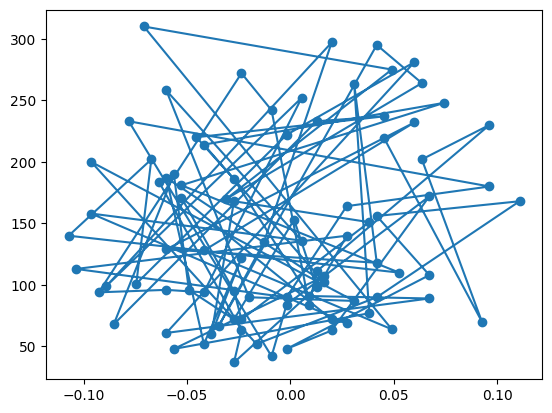

In [10]:

plt.scatter(x_test['age'],y_test)
plt.plot(x_test['age'], y_predict)
plt.show()

In [11]:
mse = mean_squared_error(y_test,y_predict)
mse

2.3626827291653134e-27

In [12]:
mae = mean_absolute_error(y_test, y_predict)
mae

3.824156971113348e-14

In [13]:
dataset.to_csv('diabetes.csv')

In [14]:
correlation = dataset.corr()
correlation

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,BloodSugar
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [15]:
correlation['BloodSugar'].sort_values(ascending=False)


BloodSugar    1.000000
bmi           0.586450
s5            0.565883
bp            0.441482
s4            0.430453
s6            0.382483
s1            0.212022
age           0.187889
s2            0.174054
sex           0.043062
s3           -0.394789
Name: BloodSugar, dtype: float64

array([[<AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='s5', ylabel='bmi'>,
        <AxesSubplot:xlabel='s3', ylabel='bmi'>,
        <AxesSubplot:xlabel='BloodSugar', ylabel='bmi'>],
       [<AxesSubplot:xlabel='bmi', ylabel='s5'>,
        <AxesSubplot:xlabel='s5', ylabel='s5'>,
        <AxesSubplot:xlabel='s3', ylabel='s5'>,
        <AxesSubplot:xlabel='BloodSugar', ylabel='s5'>],
       [<AxesSubplot:xlabel='bmi', ylabel='s3'>,
        <AxesSubplot:xlabel='s5', ylabel='s3'>,
        <AxesSubplot:xlabel='s3', ylabel='s3'>,
        <AxesSubplot:xlabel='BloodSugar', ylabel='s3'>],
       [<AxesSubplot:xlabel='bmi', ylabel='BloodSugar'>,
        <AxesSubplot:xlabel='s5', ylabel='BloodSugar'>,
        <AxesSubplot:xlabel='s3', ylabel='BloodSugar'>,
        <AxesSubplot:xlabel='BloodSugar', ylabel='BloodSugar'>]],
      dtype=object)

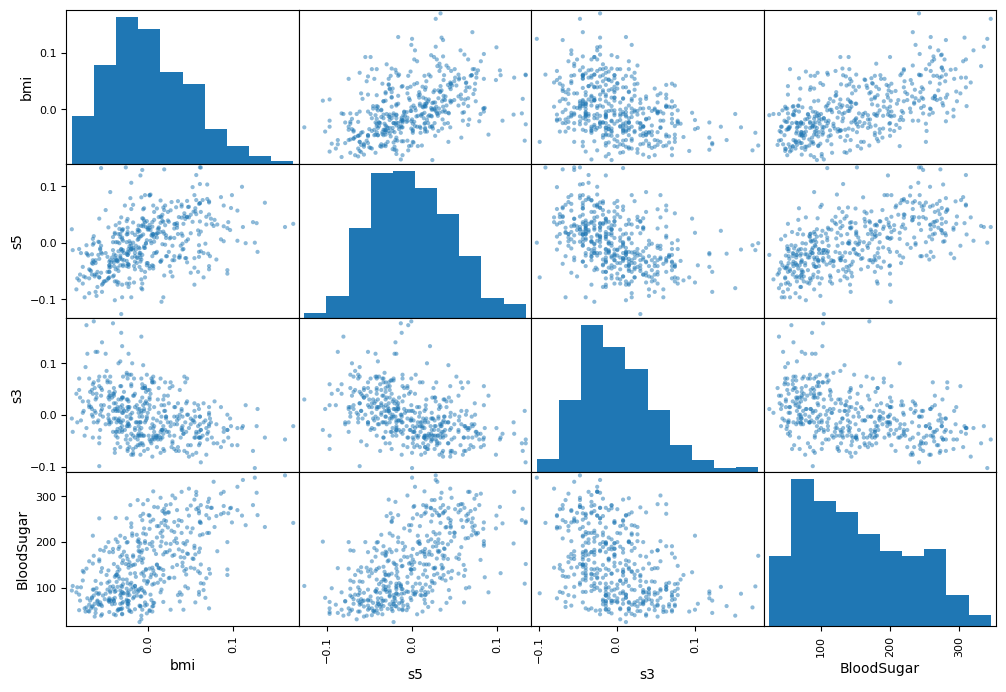

In [16]:
from pandas.plotting import scatter_matrix
attributes = ['bmi','s5','s3','BloodSugar']
scatter_matrix(dataset[attributes], figsize=(12,8))




<AxesSubplot:xlabel='bmi', ylabel='s5'>

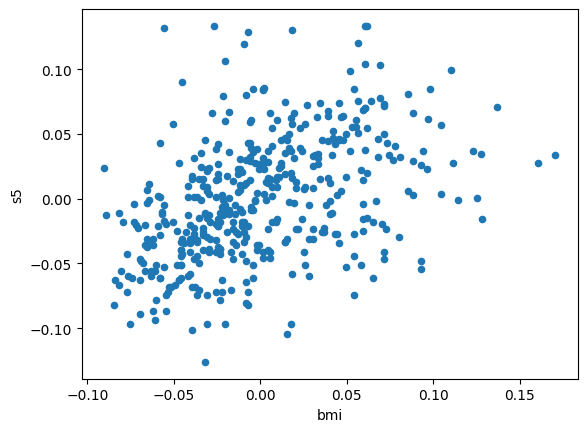

In [17]:
dataset.plot(kind = 'scatter',x = 'bmi',y = 's5',alpha =1.0)